In [11]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from scipy.signal import find_peaks
import math

In [12]:
#reading the data from csv
data = pd.read_csv('/content/User2_pocket_10.csv').dropna()
data.head()

#acceleration values 
x = list(data['x'])
y = list(data['y'])
z = list(data['z'])

#total time elpased i.e. duration for which the data is collected
time = list(data['seconds_elapsed'])
total_time = time[len(time)-1]
print("Total time: ",total_time)

#sampling frequency
# fs = number of samples/ duration of signal
fs = len(time)/total_time
print("Sampling Frequency: ",fs)

#magnitude of the acceleration
mag = []
for i in range(len(x)):
  mag.append(math.sqrt(x[i]**2 + y[i]**2 + z[i]**2))

Total time:  9.316840087890624
Sampling Frequency:  61.930868680460044


In [13]:
#Function for Normalizing the data 
#https://stackoverflow.com/questions/18380419/normalization-to-bring-in-the-range-of-0-1
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [14]:
#Function for badpass filter
#https://stackoverflow.com/questions/63859350/java-alternative-for-scipy-butterworth-bandpass-filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq

    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

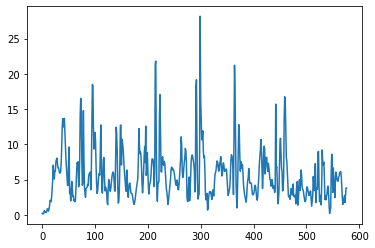

In [15]:
#plot for magnitude and time
plt.plot(mag)

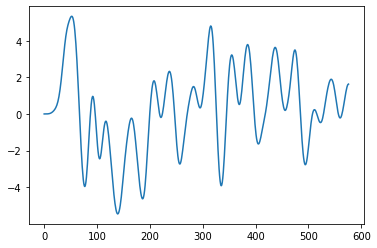

In [16]:
#usual effective frequency of walking is 0-2Hz
#filtering the data in this range
mag_filtered = butter_bandpass_filter(mag,0.1,2,fs)
plt.plot(mag_filtered)

#normalizing the filtered data
mag_norm = NormalizeData(mag_filtered)
mag_norm = mag_norm[int(len(mag_norm)/10):]

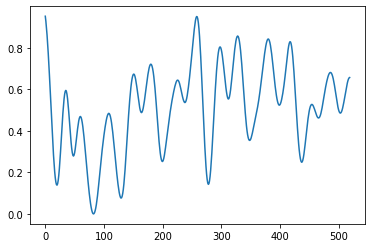

In [17]:
#plotting normalized magnitude 
plt.plot(mag_norm)

13


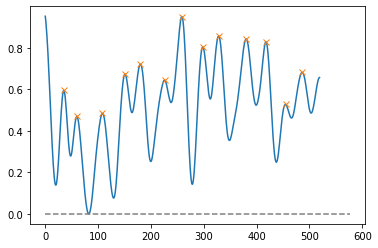

In [21]:
#applying peak detection algorithm
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

peaks, _ = find_peaks(mag_norm, height = 0.35, distance = int(fs/4) -1)
print(len(peaks)) # counting the number of peaks

plt.plot(mag_norm)
plt.plot(peaks, mag_norm[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

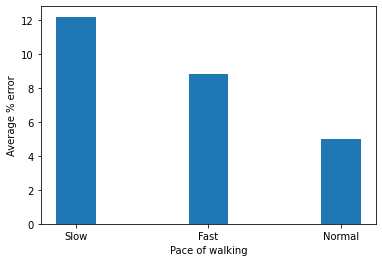

In [19]:
#bar plot for Average error % for different walking speeds

error = {'Slow':12.22, 'Fast':8.86, 'Normal':5}
pace = list(error.keys())
error = list(error.values())

# creating the bar plot
plt.bar(pace, error, width = 0.3)
 
plt.xlabel("Pace of walking")
plt.ylabel("Average % error")
plt.show()

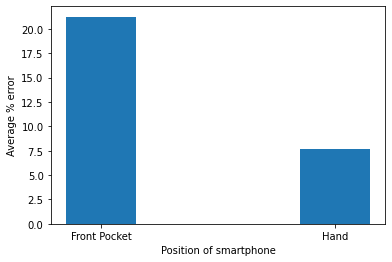

In [20]:
#bar plot for Average error % for different postions of phone

error = {'Front Pocket':21.25, 'Hand':7.66}
position = list(error.keys())
error = list(error.values())

# creating the bar plot
plt.bar(position, error, width = 0.3)

 
plt.xlabel("Position of smartphone")
plt.ylabel("Average % error")
plt.show()